In [31]:
import os,natsort
# plot the time for each batch
import matplotlib.pyplot as plt
import pandas as pd


In [32]:
dir = '/mydata/per_batch_training_time_on_gpu/'

In [33]:
#  get all the files in the directory
files = os.listdir(dir)

#  sort the files
files = natsort.natsorted(files)

max_batch_time = 0
max_batch_file = ''
config_to_time = {}
for file in files:
    if not file.endswith('.log'):
        print('The file ' + file + ' is not a log file.')
        exit(1)
    with open(dir + file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            time = line.split(' ')[0]
            if float(time) > max_batch_time:
                max_batch_time = float(time)
                max_batch_file = file
            print(file,line)
            config = file.split('.')[0]
            config_to_time[config] = time


b128_gpu1.log 108.50713348388672 ms
b128_gpu2.log 68.83430480957031 ms
b128_gpu3.log 57.34195327758789 ms
b128_gpu4.log 46.38105773925781 ms
b256_gpu1.log 208.65536499023438 ms
b256_gpu2.log 124.83071899414062 ms
b256_gpu3.log 100.20044708251953 ms
b256_gpu4.log 88.80332946777344 ms
b512_gpu1.log 416.2088928222656 ms
b512_gpu2.log 236.2388458251953 ms
b512_gpu3.log 189.86598205566406 ms
b512_gpu4.log 166.7071990966797 ms
b1024_gpu2.log 470.27508544921875 ms
b1024_gpu3.log 371.7652587890625 ms
b1024_gpu4.log 325.5941162109375 ms


In [34]:
# print max batch time and the file
print('The max batch time is ' + str(max_batch_time) + 'ms in the file ' + max_batch_file)

The max batch time is 470.27508544921875ms in the file b1024_gpu2.log


In [35]:
config_to_time

{'b128_gpu1': '108.50713348388672',
 'b128_gpu2': '68.83430480957031',
 'b128_gpu3': '57.34195327758789',
 'b128_gpu4': '46.38105773925781',
 'b256_gpu1': '208.65536499023438',
 'b256_gpu2': '124.83071899414062',
 'b256_gpu3': '100.20044708251953',
 'b256_gpu4': '88.80332946777344',
 'b512_gpu1': '416.2088928222656',
 'b512_gpu2': '236.2388458251953',
 'b512_gpu3': '189.86598205566406',
 'b512_gpu4': '166.7071990966797',
 'b1024_gpu2': '470.27508544921875',
 'b1024_gpu3': '371.7652587890625',
 'b1024_gpu4': '325.5941162109375'}

Text(1, 480, 'Moving to device + forward and backward pass <= 500 ms')

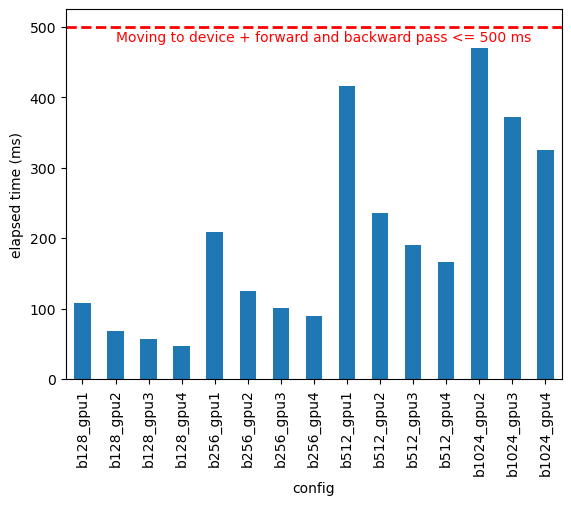

In [36]:
df = pd.DataFrame(list(config_to_time.items()), columns=['config', 'time'])

df['time'] = df['time'].astype(float)
df.plot(kind='bar',x='config',y='time')
# no legend
plt.legend().remove()
# y axis label
plt.ylabel('elapsed time (ms)')
# add horizontal line at 500 ms with large red dashed line
plt.axhline(y=500, color='r', linestyle='--', linewidth=2)
# annotate the line
plt.text(1, 480, 'Moving to device + forward and backward pass <= 500 ms', color = 'red')


